#### Iterative Approach
1. Initialize centroids(Randomly)
2. Repeat until converge
    1. Update cluster labels: assign points to nearest centroids
    2. Update centroids: set center to mean of each cluster

In [370]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [371]:
X, cls = make_blobs(n_samples=10000, n_features=2, centers=3, cluster_std=4, random_state=100)
df = pd.DataFrame({'f1': X[:,0], 'f2': X[:,1], 'class': cls})
df.head()

,f1,f2,class
0,-10.135521,8.676626,1
1,-7.203527,7.507260,1
2,11.758731,-5.584263,0
3,-12.428340,-5.281420,2
4,-6.302078,5.209702,1


In [372]:
X

array([[-10.13552059,   8.67662583],
       [ -7.20352661,   7.50725969],
       [ 11.75873078,  -5.58426306],
       ...,
       [ -0.10634322,   3.66584612],
       [  1.75766207,  -7.17229924],
       [ -3.26190637,   6.31856463]])

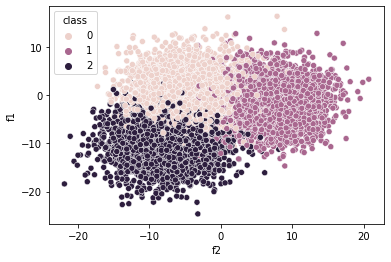

In [373]:
sns.scatterplot(data=df, y=df['f1'], x=df['f2'], hue=df['class'])
plt.show()

In [374]:
# https://www.reneshbedre.com/blog/kmeans-clustering-python.html
# https://machinelearningmastery.com/vector-norms-machine-learning/#:~:text=The%20L2%20norm%20calculates%20the,is%20a%20positive%20distance%20value.

In [375]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

euclidean_distance(X[:1,:], X[:2,:])

3.1565813593792247

In [376]:
random_number = np.random.randint(0, len(df), size=3)
centroids = [X[n] for n in random_number]
clusters = [[] for _ in range(3)]
#clustered_labels = [[] for _ in range(3)]
clustered_labels = []

In [377]:
for _ in range(200):
    for idx, sample in enumerate(X):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        clusters[closest_index].append(idx)
        centroids_old = centroids
        
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(3)]
    print(centroids_old, centroids)
    if sum(distances) == 0: 
        break

[array([-7.30795063, -8.95160756]), array([-1.98269387,  3.03820593]), array([ 7.1442766 , -5.36288405])] [array([-7.30795063, -8.95160756]), array([-1.98269387,  3.03820593]), array([ 7.1442766 , -5.36288405])]


In [378]:
# clusters

In [379]:
for idx, cluster in enumerate(clusters):
    for sample in cluster:
        sample_arr = X[sample].tolist()
        sample_arr.append(idx)
        clustered_labels.append(sample_arr)

In [380]:
# clustered_labels

In [381]:
df_new = pd.DataFrame(clustered_labels, columns=['f1', 'f2', 'class'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      10000 non-null  float64
 1   f2      10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


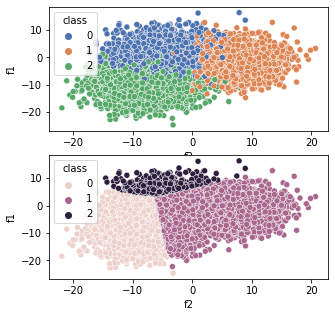

In [382]:
fig, ax = plt.subplots(2, 1, figsize=(5,5))

sns.scatterplot(data=df, y=df['f1'], x=df['f2'], hue=df['class'], palette='deep', ax=ax[0])
sns.scatterplot(data=df_new, y=df_new['f1'], x=df_new['f2'], hue=df_new['class'], ax=ax[1])
plt.show()

In [383]:
(X[:1,:] - X[1:2,:]) ** 2

array([[8.59658871, 1.36741717]])

In [384]:
X[:1,:]

array([[-10.13552059,   8.67662583]])

In [385]:
X[1:2,:]

array([[-7.20352661,  7.50725969]])